# Import and Downloads

## Install Modules

In [1]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 6.7 MB/s 


In [2]:
! git clone https://github.com/GuiSilvaPA/TextToImage.git

Cloning into 'TextToImage'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 271 (delta 25), reused 34 (delta 14), pack-reused 226
Receiving objects: 100% (271/271), 21.05 MiB | 27.56 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.1 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
     |████████████████████████████████| 6.6 MB 50.6 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install resize_right

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install einops_exts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [7]:
import sys
sys.path.insert(0,'/content/TextToImage/Imagen')

In [8]:
import torch
from Imagen import Imagen

Downloading:   0%|          | 0.00/537 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.1.EncDecAttention.o.weight', 'decoder.block.3.layer.0.SelfAttention.q.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.7.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.q.weight', 'decoder.block.5.layer.0.SelfAttention.q.weight', 'decoder.block.5.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.1.layer_norm.weight', 'decoder.block.2.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.o.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.0.SelfAttention.k.weight', 'decoder.block.6.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.0.SelfAttention.q.weight', 'decoder.block.4.layer.2.Dense

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

In [9]:
from OldComplexModels import UNet
from ImagenTools import CustomDataset, ImagenTrainer

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.1.EncDecAttention.o.weight', 'decoder.block.3.layer.0.SelfAttention.q.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.7.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.q.weight', 'decoder.block.5.layer.0.SelfAttention.q.weight', 'decoder.block.5.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.1.layer_norm.weight', 'decoder.block.2.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.o.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.0.SelfAttention.k.weight', 'decoder.block.6.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.0.SelfAttention.q.weight', 'decoder.block.4.layer.2.Dense

In [10]:
from torch.utils.data import Dataset, DataLoader
import json
import h5py
import numpy as np
from torchvision import transforms
import random

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch.nn as nn

from torch.optim import Adam
from pathlib import Path

import cv2

import torchvision.transforms as T

In [11]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Download COCO Dataset

In [12]:
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_IMAGES_coco_5_cap_per_img.hdf5

--2022-07-25 12:24:25--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289777 (283K) [application/json]
Saving to: ‘TEST_CAPTIONS_coco_5_cap_per_img.json’

TEST_CAPTIONS_coco_ 100%[===================>] 282.99K  --.-KB/s    in 0.002s  

2022-07-25 12:24:25 (132 MB/s) - ‘TEST_CAPTIONS_coco_5_cap_per_img.json’ saved [289777/289777]

--2022-07-25 12:24:25--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sen

# Dataset and Model

In [13]:
from PIL import Image
from ImagenTools import CustomDataset, collate_any

In [14]:
train_set = CustomDataset("./TRAIN_IMAGES_coco_5_cap_per_img.hdf5", "./TRAIN_CAPTIONS_coco_5_cap_per_img.json", image_size=64)
val_set   = CustomDataset("./VAL_IMAGES_coco_5_cap_per_img.hdf5", "./VAL_CAPTIONS_coco_5_cap_per_img.json",     image_size=64)
test_set  = CustomDataset("./TEST_IMAGES_coco_5_cap_per_img.hdf5", "./TEST_CAPTIONS_coco_5_cap_per_img.json",   image_size=64)

## Dataset Tester

In [ ]:
train_loader = DataLoader(train_set, batch_size=10, collate_fn=collate_any)

In [ ]:
imgs, texts = next(iter(train_loader))

print(type(imgs), type(texts))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [ ]:
texts

array(['A woman is holding a cat in her kitchen.',
       'A truck carries a large amount of items and a few people.',
       'A large boat filled with mean on wheels.',
       'A pigeon greets three bicyclists on a park path',
       'A white toilet sits on the front lawn.',
       'A donut on the antenna of a car.',
       'a cat with a big fluffy tail sitting on top of a car tire ',
       'A large jetliner flying over a traffic filled street.',
       'THERE IS A MAN WITH BOOK BAG ON HIS BAG ',
       'A horse drawn carriage is parked along the curb.'], dtype='<U58')

In [ ]:
imgs.shape

torch.Size([10, 3, 64, 64])

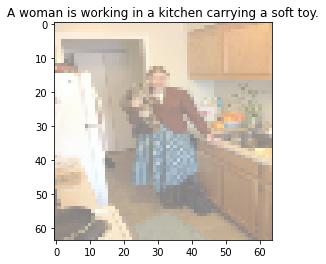

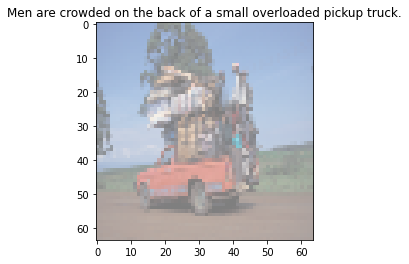

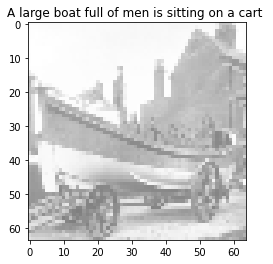

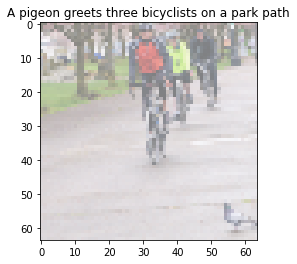

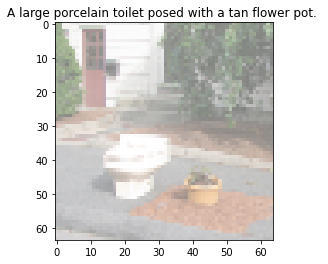

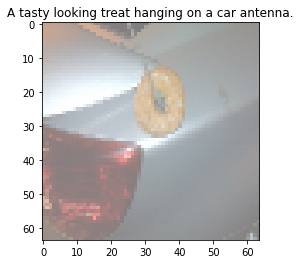

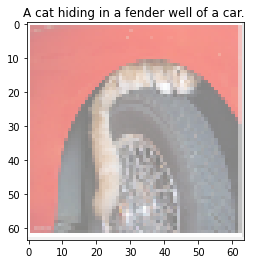

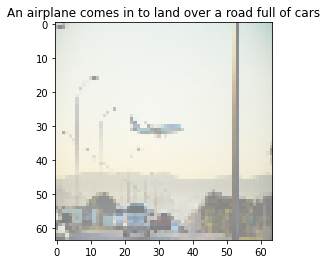

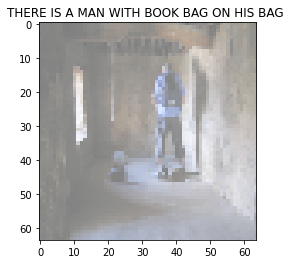

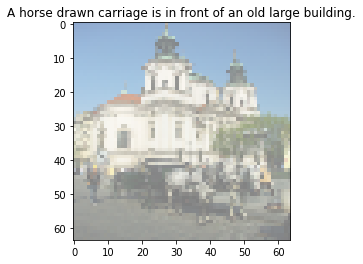

In [ ]:
imgs, texts = next(iter(train_loader))
for img, text in zip(imgs, texts):
    # Para apresentar as imagens é necessario desfazer a normalização empregada nas imagens
    plt.imshow((img.numpy().transpose(1, 2, 0)+1)/2) # adversarial
    plt.title(text)
    plt.show()

# Model Initialization

In [15]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [16]:
unet1 = UNet(dim = 64, cond_dim = 512, text_embed_dim = 512,  # 32
             dim_mults = (1, 2, 4, 8), num_resnet_blocks = 3, # (1, 2, 4, 8) - 3
             layer_attns = (False, True, True, True),
             layer_cross_attns = (False, True, True, True), device=device).to(device)

imgen_model = Imagen((unet1,), image_sizes=(64,), timesteps=4000,
                      text_encoder_name = 'google/t5-v1_1-small', cond_drop_prob = 0.3, device=device).to(device) # 0.1

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.1.EncDecAttention.o.weight', 'decoder.block.3.layer.0.SelfAttention.q.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.7.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.q.weight', 'decoder.block.5.layer.0.SelfAttention.q.weight', 'decoder.block.5.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.1.layer_norm.weight', 'decoder.block.2.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.o.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.0.SelfAttention.k.weight', 'decoder.block.6.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.0.SelfAttention.q.weight', 'decoder.block.4.layer.2.Dense

In [ ]:
from functools import reduce

def pytorch_count_params(model):
    "count number trainable parameters in a pytorch model"
    total_params = sum(reduce( lambda a, b: a*b, x.size()) for x in model.parameters())
    return total_params

pytorch_count_params(unet1)

77532772

In [17]:
batch_size  = 20
num_workers = 2

train_loader = DataLoader(train_set,
                          shuffle=True,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          collate_fn=collate_any)

val_loader = DataLoader(val_set,
                        batch_size=1,
                        num_workers=num_workers,
                        collate_fn=collate_any)

test_loader = DataLoader(test_set,
                         num_workers=num_workers,
                         collate_fn=collate_any)

# Model Training

In [18]:
from ImagenTools import ImagenTrainer

# Begin Train

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 220, first_epoch=211, p=21, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p21.pth.tar')

  0%|          | 0/10 [00:00<?, ?it/s]


================================ EPOCH 211 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 211 | Train Loss: 0.039165438410230485 | Valid Loss: 0.019427281812599378

================================ EPOCH 212 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 212 | Train Loss: 0.03890133673660964 | Valid Loss: 0.01987735199195188

================================ EPOCH 213 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 213 | Train Loss: 0.03887143134231343 | Valid Loss: 0.019706140347534182

================================ EPOCH 214 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 214 | Train Loss: 0.03923349783496082 | Valid Loss: 0.019442620972207832

================================ EPOCH 215 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 215 | Train Loss: 0.039349666177326825 | Valid Loss: 0.01933528353320313

================================ EPOCH 216 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 216 | Train Loss: 0.03913044898539503 | Valid Loss: 0.019148172845455835

================================ EPOCH 217 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 217 | Train Loss: 0.0391728488259575 | Valid Loss: 0.019156667374074402

================================ EPOCH 218 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 218 | Train Loss: 0.039020032030340206 | Valid Loss: 0.01966912343148565

================================ EPOCH 219 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 219 | Train Loss: 0.03859059502003195 | Valid Loss: 0.019700781384321638

================================ EPOCH 220 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 220 | Train Loss: 0.038725411601770086 | Valid Loss: 0.01888942203621889


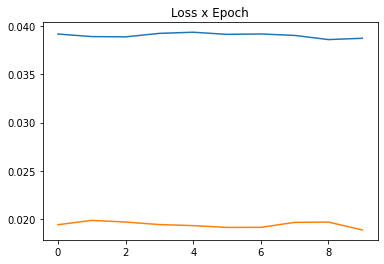

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 230, first_epoch=221, p=22, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]


================================ EPOCH 221 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 221 | Train Loss: 0.039607552618269815 | Valid Loss: 0.018966392144288476

================================ EPOCH 222 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 222 | Train Loss: 0.03890220077112824 | Valid Loss: 0.019087640742337868

================================ EPOCH 223 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 223 | Train Loss: 0.03868959259897547 | Valid Loss: 0.018922129781752294

================================ EPOCH 224 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 224 | Train Loss: 0.03896454762632572 | Valid Loss: 0.018668600035741254

================================ EPOCH 225 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 225 | Train Loss: 0.03848089007375648 | Valid Loss: 0.019097571189511917

================================ EPOCH 226 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 226 | Train Loss: 0.03880789210437005 | Valid Loss: 0.01888840968637398

================================ EPOCH 227 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 227 | Train Loss: 0.039495372340133804 | Valid Loss: 0.019046209928621237

================================ EPOCH 228 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 228 | Train Loss: 0.038887742480744614 | Valid Loss: 0.01940418835304284

================================ EPOCH 229 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 229 | Train Loss: 0.038835604733717784 | Valid Loss: 0.01953390041643453

================================ EPOCH 230 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 230 | Train Loss: 0.03879752229633076 | Valid Loss: 0.019509535748636047


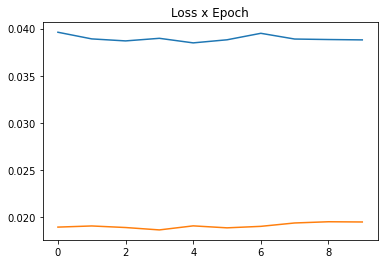

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 250, first_epoch=231, p=23, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 231 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 231 | Train Loss: 0.03884671779102361 | Valid Loss: 0.019754664271553365

================================ EPOCH 232 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 232 | Train Loss: 0.039366921607157865 | Valid Loss: 0.019014554576497453

================================ EPOCH 233 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 233 | Train Loss: 0.039239840502819034 | Valid Loss: 0.018650382175760413

================================ EPOCH 234 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 234 | Train Loss: 0.0392525063235262 | Valid Loss: 0.01937514282667421

================================ EPOCH 235 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 235 | Train Loss: 0.03902531816342174 | Valid Loss: 0.020075021659233708

================================ EPOCH 236 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 236 | Train Loss: 0.03872656506378533 | Valid Loss: 0.01960761651795463

================================ EPOCH 237 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 237 | Train Loss: 0.03914624574074686 | Valid Loss: 0.018693603533731788

================================ EPOCH 238 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 238 | Train Loss: 0.038781044599251684 | Valid Loss: 0.019047455782869007

================================ EPOCH 239 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 239 | Train Loss: 0.03902793132231197 | Valid Loss: 0.019450084747069177

================================ EPOCH 240 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 240 | Train Loss: 0.039053339376526115 | Valid Loss: 0.019241898484815396

================================ EPOCH 241 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 241 | Train Loss: 0.03910439162749518 | Valid Loss: 0.01920611999356336

================================ EPOCH 242 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 242 | Train Loss: 0.038833049122801645 | Valid Loss: 0.019158872882057896

================================ EPOCH 243 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 243 | Train Loss: 0.03885898119009727 | Valid Loss: 0.019920239129211394

================================ EPOCH 244 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 244 | Train Loss: 0.03892147014088625 | Valid Loss: 0.018542285400742726

================================ EPOCH 245 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 245 | Train Loss: 0.03869067522266335 | Valid Loss: 0.019221587017572598

================================ EPOCH 246 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 246 | Train Loss: 0.038891190275720945 | Valid Loss: 0.018950131379824597

================================ EPOCH 247 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 247 | Train Loss: 0.039083778348174836 | Valid Loss: 0.018365398478297153

================================ EPOCH 248 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 248 | Train Loss: 0.03863952478922929 | Valid Loss: 0.018626370135912854

================================ EPOCH 249 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 249 | Train Loss: 0.0393995777981001 | Valid Loss: 0.019786642530931972

================================ EPOCH 250 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 250 | Train Loss: 0.03925303915170256 | Valid Loss: 0.018830864014230272


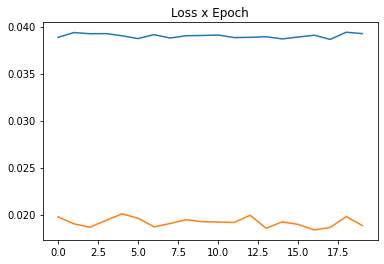

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 280, first_epoch=251, p=25, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

  0%|          | 0/30 [00:00<?, ?it/s]


================================ EPOCH 251 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 251 | Train Loss: 0.039048505707827655 | Valid Loss: 0.019140319675445334

================================ EPOCH 252 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 252 | Train Loss: 0.039036508201349046 | Valid Loss: 0.01911955430242128

================================ EPOCH 253 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 253 | Train Loss: 0.03882835172100917 | Valid Loss: 0.019280578944205304

================================ EPOCH 254 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 254 | Train Loss: 0.03912143918786983 | Valid Loss: 0.01972531403272761

================================ EPOCH 255 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 255 | Train Loss: 0.03886146206871233 | Valid Loss: 0.01980182991332455

================================ EPOCH 256 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 256 | Train Loss: 0.03878500565195925 | Valid Loss: 0.019658540273518613

================================ EPOCH 257 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 257 | Train Loss: 0.03865417531298689 | Valid Loss: 0.019545324724314764

================================ EPOCH 258 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 258 | Train Loss: 0.0386981164488536 | Valid Loss: 0.019497478803856116

================================ EPOCH 259 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 259 | Train Loss: 0.03847011519424921 | Valid Loss: 0.019545925980936057

================================ EPOCH 260 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 280, first_epoch=260, p=26, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p26.pth.tar')

  0%|          | 0/21 [00:00<?, ?it/s]


================================ EPOCH 260 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 260 | Train Loss: 0.03884884858738352 | Valid Loss: 0.019232392042107083

================================ EPOCH 261 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 261 | Train Loss: 0.038929742317469346 | Valid Loss: 0.019856443879454167

================================ EPOCH 262 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 262 | Train Loss: 0.039020901564888806 | Valid Loss: 0.01989784034906011

================================ EPOCH 263 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 263 | Train Loss: 0.03881931186457272 | Valid Loss: 0.01953729355017987

================================ EPOCH 264 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 264 | Train Loss: 0.038948962021441685 | Valid Loss: 0.01965897798872764

================================ EPOCH 265 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 265 | Train Loss: 0.03886153275023538 | Valid Loss: 0.019145805897833167

================================ EPOCH 266 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 266 | Train Loss: 0.03859174955591914 | Valid Loss: 0.019682908595033966

================================ EPOCH 267 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 267 | Train Loss: 0.038660033551348866 | Valid Loss: 0.019037065300804696

================================ EPOCH 268 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 268 | Train Loss: 0.03889458820692637 | Valid Loss: 0.01865330967543413

================================ EPOCH 269 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 269 | Train Loss: 0.03878245458282454 | Valid Loss: 0.018896192389481946

================================ EPOCH 270 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 270 | Train Loss: 0.03904580565717477 | Valid Loss: 0.018506808017485443

================================ EPOCH 271 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 271 | Train Loss: 0.03867590741007304 | Valid Loss: 0.01891586266405277

================================ EPOCH 272 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 272 | Train Loss: 0.03927484190338576 | Valid Loss: 0.01874971274423756

================================ EPOCH 273 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 273 | Train Loss: 0.03886588876370062 | Valid Loss: 0.019571397412435982

================================ EPOCH 274 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 274 | Train Loss: 0.03919643802856583 | Valid Loss: 0.01888209994691704

================================ EPOCH 275 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 275 | Train Loss: 0.039276425847878715 | Valid Loss: 0.019756664747657554

================================ EPOCH 276 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 276 | Train Loss: 0.03902988525687204 | Valid Loss: 0.01867484696218809

================================ EPOCH 277 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 277 | Train Loss: 0.03870852339100473 | Valid Loss: 0.01897010421136393

================================ EPOCH 278 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 278 | Train Loss: 0.03897139084839015 | Valid Loss: 0.01947117755882414

================================ EPOCH 279 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 279 | Train Loss: 0.03854631625834954 | Valid Loss: 0.019453337166789025

================================ EPOCH 280 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 280 | Train Loss: 0.03874720321559556 | Valid Loss: 0.019468280302027897


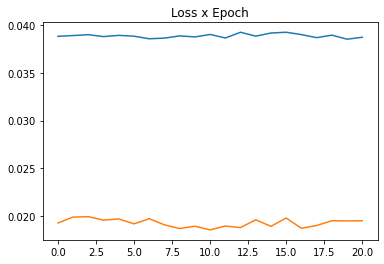

In [ ]:
trainer(train_loader, val_loader,
        path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p',
        inter_path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p26.pth.tar')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 300, first_epoch=281, p=28, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 281 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 281 | Train Loss: 0.03882067767763827 | Valid Loss: 0.019078647836296068

================================ EPOCH 282 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 282 | Train Loss: 0.03877782895226589 | Valid Loss: 0.01876420679471564

================================ EPOCH 283 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 283 | Train Loss: 0.03904583446402736 | Valid Loss: 0.019185950115459788

================================ EPOCH 284 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 284 | Train Loss: 0.03903970789943575 | Valid Loss: 0.019820101374814825

================================ EPOCH 285 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 285 | Train Loss: 0.03850717683794724 | Valid Loss: 0.019058154817463813

================================ EPOCH 286 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 286 | Train Loss: 0.038756315550469114 | Valid Loss: 0.018857799324552768

================================ EPOCH 287 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 287 | Train Loss: 0.03934466551995652 | Valid Loss: 0.019601914561964195

================================ EPOCH 288 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 288 | Train Loss: 0.03876997015936313 | Valid Loss: 0.019218192465319837

================================ EPOCH 289 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 289 | Train Loss: 0.038845389481114385 | Valid Loss: 0.019031438479056865

================================ EPOCH 290 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 290 | Train Loss: 0.03889952167127358 | Valid Loss: 0.018703911033388847

================================ EPOCH 291 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 291 | Train Loss: 0.03851019231076701 | Valid Loss: 0.019423365244678862

================================ EPOCH 292 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 292 | Train Loss: 0.0386377543616457 | Valid Loss: 0.01887058745859414

================================ EPOCH 293 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 293 | Train Loss: 0.03867549310694924 | Valid Loss: 0.019089086031745785

================================ EPOCH 294 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 294 | Train Loss: 0.03920130028633312 | Valid Loss: 0.01913529453631505

================================ EPOCH 295 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 295 | Train Loss: 0.03850614851765132 | Valid Loss: 0.018652519090123807

================================ EPOCH 296 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 296 | Train Loss: 0.03917019698946249 | Valid Loss: 0.019360628456818806

================================ EPOCH 297 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 297 | Train Loss: 0.03888674852910268 | Valid Loss: 0.01902936867451619

================================ EPOCH 298 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 298 | Train Loss: 0.03863485522257785 | Valid Loss: 0.01904976845991229

================================ EPOCH 299 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 299 | Train Loss: 0.03896736292022781 | Valid Loss: 0.019021030954915412

================================ EPOCH 300 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 300 | Train Loss: 0.03885699063381117 | Valid Loss: 0.01883813568295793


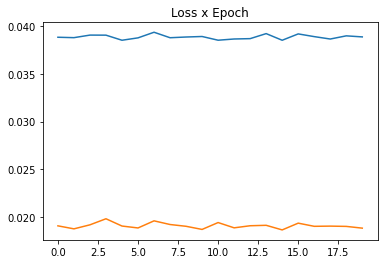

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p')

# Final Train

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 320, first_epoch=301, p=30, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p30.pth.tar')

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 301 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 301 | Train Loss: 0.03892834784960387 | Valid Loss: 0.01932870396721653

================================ EPOCH 302 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 302 | Train Loss: 0.03914014511538961 | Valid Loss: 0.018597665375526345

================================ EPOCH 303 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 303 | Train Loss: 0.03864352925455666 | Valid Loss: 0.01881468099139198

================================ EPOCH 304 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 304 | Train Loss: 0.03881476114212605 | Valid Loss: 0.019097186768517238

================================ EPOCH 305 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 305 | Train Loss: 0.03866753663683982 | Valid Loss: 0.01923572846122908

================================ EPOCH 306 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 306 | Train Loss: 0.038638894207028 | Valid Loss: 0.019300436919026994

================================ EPOCH 307 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 307 | Train Loss: 0.03887961738422944 | Valid Loss: 0.018646274457408775

================================ EPOCH 308 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 308 | Train Loss: 0.03908429545632304 | Valid Loss: 0.019894478099379085

================================ EPOCH 309 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 309 | Train Loss: 0.03907952225231724 | Valid Loss: 0.019185251225830653

================================ EPOCH 310 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 310 | Train Loss: 0.038846744499232644 | Valid Loss: 0.019472901776393346

================================ EPOCH 311 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 311 | Train Loss: 0.03908395640738942 | Valid Loss: 0.018861075967374106

================================ EPOCH 312 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 312 | Train Loss: 0.03806147303552601 | Valid Loss: 0.018514105868760403

================================ EPOCH 313 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 313 | Train Loss: 0.038497224484956793 | Valid Loss: 0.01999590303717446

================================ EPOCH 314 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 314 | Train Loss: 0.03900980909408837 | Valid Loss: 0.0190036833721591

================================ EPOCH 315 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 315 | Train Loss: 0.038614337867106864 | Valid Loss: 0.01948778444924403

================================ EPOCH 316 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 316 | Train Loss: 0.03847240979647023 | Valid Loss: 0.019114180733377412

================================ EPOCH 317 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 317 | Train Loss: 0.03927406125708299 | Valid Loss: 0.019218847281717553

================================ EPOCH 318 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 318 | Train Loss: 0.03830718336988012 | Valid Loss: 0.019046950765155796

================================ EPOCH 319 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 319 | Train Loss: 0.038792877892019594 | Valid Loss: 0.019240795994483743

================================ EPOCH 320 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 320 | Train Loss: 0.03842263177138607 | Valid Loss: 0.019591362800463186


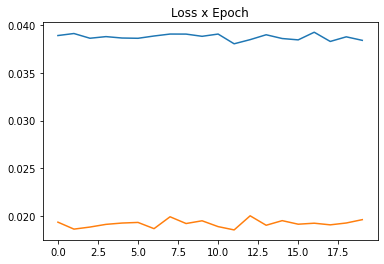

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 340, first_epoch=321, p=32, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 321 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 321 | Train Loss: 0.038616139417178424 | Valid Loss: 0.019121728963740394

================================ EPOCH 322 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 322 | Train Loss: 0.03879620727202317 | Valid Loss: 0.01947976552896295

================================ EPOCH 323 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 323 | Train Loss: 0.03866386029007686 | Valid Loss: 0.01943763859965556

================================ EPOCH 324 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 324 | Train Loss: 0.03876238942802029 | Valid Loss: 0.01982923755624744

================================ EPOCH 325 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 325 | Train Loss: 0.03891998791408275 | Valid Loss: 0.019415775825918656

================================ EPOCH 326 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 340, first_epoch=326, p=33, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p33.pth.tar')

In [ ]:
trainer(train_loader, val_loader,
        path='/content/drive/MyDrive/TextToImage64/v6p',
        inter_path='/content/drive/MyDrive/TextToImage64/v6p33.pth.tar')

  0%|          | 0/15 [00:00<?, ?it/s]


================================ EPOCH 326 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 326 | Train Loss: 0.039022560066663894 | Valid Loss: 0.01917095797663255

================================ EPOCH 327 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 327 | Train Loss: 0.03908569604034859 | Valid Loss: 0.019418399389276586

================================ EPOCH 328 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 328 | Train Loss: 0.03899654110918949 | Valid Loss: 0.019527072117853095

================================ EPOCH 329 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 329 | Train Loss: 0.03858303312421301 | Valid Loss: 0.01897581919683771

================================ EPOCH 330 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 330 | Train Loss: 0.03879944765686887 | Valid Loss: 0.01957973322386846

================================ EPOCH 331 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 331 | Train Loss: 0.038517688846114236 | Valid Loss: 0.018997765015128364

================================ EPOCH 332 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 340, first_epoch=332, p=34, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p34.pth.tar')

  0%|          | 0/9 [00:00<?, ?it/s]


================================ EPOCH 332 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 332 | Train Loss: 0.03897810465858958 | Valid Loss: 0.01990528379977879

================================ EPOCH 333 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 333 | Train Loss: 0.03872095211805003 | Valid Loss: 0.01927201583771507

================================ EPOCH 334 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 334 | Train Loss: 0.038766660209631126 | Valid Loss: 0.019244514158296415

================================ EPOCH 335 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 335 | Train Loss: 0.03855953435492734 | Valid Loss: 0.018774740260164176

================================ EPOCH 336 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 336 | Train Loss: 0.038334422583254625 | Valid Loss: 0.018873414189813337

================================ EPOCH 337 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 337 | Train Loss: 0.038661839611524224 | Valid Loss: 0.019462038260031

================================ EPOCH 338 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 338 | Train Loss: 0.038339362345116375 | Valid Loss: 0.019455559394950778

================================ EPOCH 339 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 339 | Train Loss: 0.03832332709199134 | Valid Loss: 0.01999321657339811

================================ EPOCH 340 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 340 | Train Loss: 0.038662792501819074 | Valid Loss: 0.019542197370656867


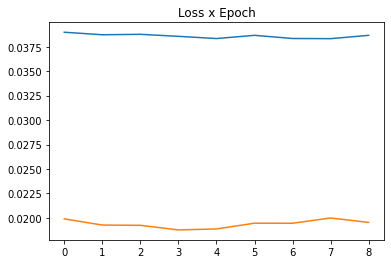

In [ ]:
trainer(train_loader, val_loader,
        path='/content/drive/MyDrive/TextToImage64/v6p',
        inter_path='/content/drive/MyDrive/TextToImage64/v6p34.pth.tar')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 360, first_epoch=341, p=34, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 341 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 341 | Train Loss: 0.039214506735835146 | Valid Loss: 0.019131785719968625

================================ EPOCH 342 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 342 | Train Loss: 0.03860900243570027 | Valid Loss: 0.018722384628008615

================================ EPOCH 343 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 343 | Train Loss: 0.038553965572571874 | Valid Loss: 0.019679395380710063

================================ EPOCH 344 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 344 | Train Loss: 0.038819353031247956 | Valid Loss: 0.018568743649113126

================================ EPOCH 345 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 345 | Train Loss: 0.03880732761518586 | Valid Loss: 0.01989016511603739

================================ EPOCH 346 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 346 | Train Loss: 0.03920497518384411 | Valid Loss: 0.019175691070270697

================================ EPOCH 347 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 347 | Train Loss: 0.03856848417084385 | Valid Loss: 0.01912487673161205

================================ EPOCH 348 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 348 | Train Loss: 0.0391701637421969 | Valid Loss: 0.018771666410018522

================================ EPOCH 349 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 349 | Train Loss: 0.03859193334799437 | Valid Loss: 0.01953334589058126

================================ EPOCH 350 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 350 | Train Loss: 0.038183384491004 | Valid Loss: 0.01889217606621139

================================ EPOCH 351 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 351 | Train Loss: 0.03865067551045546 | Valid Loss: 0.018299735379676992

================================ EPOCH 352 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 352 | Train Loss: 0.03819879286266787 | Valid Loss: 0.019226385053814795

================================ EPOCH 353 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 353 | Train Loss: 0.03909310431625111 | Valid Loss: 0.019336967435911925

================================ EPOCH 354 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 354 | Train Loss: 0.038567927105314266 | Valid Loss: 0.019921512567278445

================================ EPOCH 355 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 355 | Train Loss: 0.039014279362460484 | Valid Loss: 0.019299108910530872

================================ EPOCH 356 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 356 | Train Loss: 0.039152029475678696 | Valid Loss: 0.019112621941454883

================================ EPOCH 357 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 357 | Train Loss: 0.03873757554097798 | Valid Loss: 0.019454986457905776

================================ EPOCH 358 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 358 | Train Loss: 0.03914732658335952 | Valid Loss: 0.019020183746408445

================================ EPOCH 359 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 359 | Train Loss: 0.03842297430881964 | Valid Loss: 0.018550333776631595

================================ EPOCH 360 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 360 | Train Loss: 0.03896587571369953 | Valid Loss: 0.01927224437980418


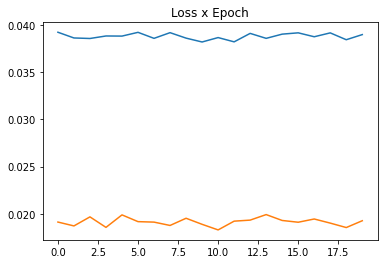

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 380, first_epoch=361, p=36, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p36.pth.tar')

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 361 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 361 | Train Loss: 0.03858331439154995 | Valid Loss: 0.019510761165687163

================================ EPOCH 362 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 362 | Train Loss: 0.03847619396203584 | Valid Loss: 0.01921865253647923

================================ EPOCH 363 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 363 | Train Loss: 0.03894048552884131 | Valid Loss: 0.018422334651031047

================================ EPOCH 364 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 364 | Train Loss: 0.03893597540445626 | Valid Loss: 0.019122438221339393

================================ EPOCH 365 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 365 | Train Loss: 0.03870715907866731 | Valid Loss: 0.019352613073192602

================================ EPOCH 366 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 366 | Train Loss: 0.03857858883704813 | Valid Loss: 0.019078023247476948

================================ EPOCH 367 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 367 | Train Loss: 0.03844847351306302 | Valid Loss: 0.018769158808950314

================================ EPOCH 368 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 368 | Train Loss: 0.03849616874528884 | Valid Loss: 0.019090340594187464

================================ EPOCH 369 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 369 | Train Loss: 0.038745795910367045 | Valid Loss: 0.019836206204281864

================================ EPOCH 370 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 370 | Train Loss: 0.03821570998323815 | Valid Loss: 0.019373366007773462

================================ EPOCH 371 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 371 | Train Loss: 0.0387719414833629 | Valid Loss: 0.01912573672307743

================================ EPOCH 372 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 380, first_epoch=371, p=37, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p37.pth.tar')

  0%|          | 0/10 [00:00<?, ?it/s]


================================ EPOCH 371 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 371 | Train Loss: 0.03836242748791872 | Valid Loss: 0.018533017022166483

================================ EPOCH 372 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 372 | Train Loss: 0.03903134372940629 | Valid Loss: 0.01908691537588283

================================ EPOCH 373 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 373 | Train Loss: 0.03784588216819807 | Valid Loss: 0.01885276751141895

================================ EPOCH 374 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 374 | Train Loss: 0.03893156421171235 | Valid Loss: 0.01967584057410067

================================ EPOCH 375 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 375 | Train Loss: 0.039038307048526094 | Valid Loss: 0.01870415502784827

================================ EPOCH 376 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 376 | Train Loss: 0.03877290712390728 | Valid Loss: 0.018514786750985786

================================ EPOCH 377 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 377 | Train Loss: 0.038642176977346086 | Valid Loss: 0.019285448523576203

================================ EPOCH 378 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 378 | Train Loss: 0.038602264773822864 | Valid Loss: 0.01872429969063659

================================ EPOCH 379 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 379 | Train Loss: 0.038793662186794385 | Valid Loss: 0.0192859534479884

================================ EPOCH 380 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 380 | Train Loss: 0.0381780719854964 | Valid Loss: 0.019163764446737595


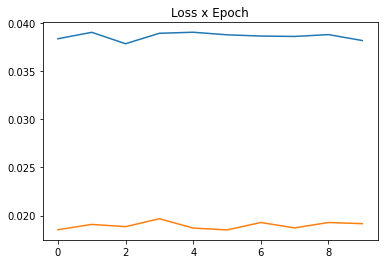

In [ ]:
trainer(train_loader, val_loader,
        path='/content/drive/MyDrive/TextToImage64/v6p',
        inter_path='/content/drive/MyDrive/TextToImage64/v6p37.pth.tar')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 400, first_epoch=381, p=38, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 381 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 381 | Train Loss: 0.03807604667765475 | Valid Loss: 0.01877790934106551

================================ EPOCH 382 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 382 | Train Loss: 0.03890112684374409 | Valid Loss: 0.018878859845158278

================================ EPOCH 383 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 383 | Train Loss: 0.03819281552747196 | Valid Loss: 0.018757267488550295

================================ EPOCH 384 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 384 | Train Loss: 0.03815645106187483 | Valid Loss: 0.019149201777477882

================================ EPOCH 385 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 385 | Train Loss: 0.03865526675493741 | Valid Loss: 0.01926121322536111

================================ EPOCH 386 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 386 | Train Loss: 0.03910305990273653 | Valid Loss: 0.020090043991431474

================================ EPOCH 387 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 387 | Train Loss: 0.038643682714501006 | Valid Loss: 0.01901767749023737

================================ EPOCH 388 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 388 | Train Loss: 0.038219539690952826 | Valid Loss: 0.01902765038943568

================================ EPOCH 389 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 389 | Train Loss: 0.038583591706309546 | Valid Loss: 0.01966164524329117

================================ EPOCH 390 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 390 | Train Loss: 0.03870274521629041 | Valid Loss: 0.019331031242458985

================================ EPOCH 391 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 391 | Train Loss: 0.03859231246755693 | Valid Loss: 0.018962923647149365

================================ EPOCH 392 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 392 | Train Loss: 0.03851537984165483 | Valid Loss: 0.018967012420740198

================================ EPOCH 393 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 393 | Train Loss: 0.03878584921322003 | Valid Loss: 0.019862606879310303

================================ EPOCH 394 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 394 | Train Loss: 0.038892759135322405 | Valid Loss: 0.01884520540705665

================================ EPOCH 395 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 395 | Train Loss: 0.03858394391175841 | Valid Loss: 0.019092474436900223

================================ EPOCH 396 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 396 | Train Loss: 0.03786669084073684 | Valid Loss: 0.019283247383684816

================================ EPOCH 397 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 397 | Train Loss: 0.03822775712382479 | Valid Loss: 0.019174439357286296

================================ EPOCH 398 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 400, first_epoch=398, p=40, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p40.pth.tar')

  0%|          | 0/3 [00:00<?, ?it/s]


================================ EPOCH 398 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 398 | Train Loss: 0.03844909492537987 | Valid Loss: 0.01939330788977869

================================ EPOCH 399 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 399 | Train Loss: 0.038827889663053256 | Valid Loss: 0.01963461080603452

================================ EPOCH 400 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 400 | Train Loss: 0.038593503378876515 | Valid Loss: 0.01926481471553471


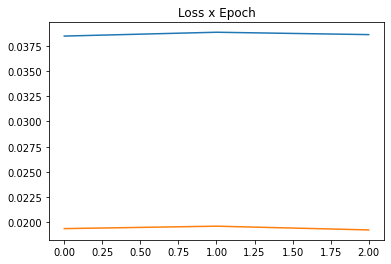

In [ ]:
trainer(train_loader, val_loader,
        path='/content/drive/MyDrive/TextToImage64/v6p',
        inter_path='/content/drive/MyDrive/TextToImage64/v6p40.pth.tar')

In [ ]:
from ComplexModels import HighResolution

In [ ]:
from pathlib import Path
path = Path('/content/drive/MyDrive/high_modelv2.pth.tar')

high_model = HighResolution([3, 16, 64]).to(device)
high_model.load_state_dict(torch.load(str(path)))

<All keys matched successfully>

In [ ]:
def get_images(trainer, loader, num_imgs):

    imgs, texts = [], []

    for m, (i, t) in enumerate(loader):
        imgs.append(i[0])
        texts.append(t[0])
        if m+1 == num_imgs: break

    images_out = trainer.sample(texts=texts, cond_scale = 3.)

    for img, im, text in zip(images_out.cpu(), imgs, texts):

        pred = high_model(img.unsqueeze(0).float().to(device))

        img  = img.cpu()
        pred = pred.cpu()
        pred = pred[0]
        fig = plt.figure(figsize=(15, 5))

        fig.add_subplot(1, 3, 1)
        plt.imshow((img.detach().numpy().transpose(1, 2, 0)+1)/2)
        plt.title('Generated Image')
        plt.axis('off')

        fig.add_subplot(1, 3, 2)
        plt.imshow((pred.detach().numpy().transpose(1, 2, 0)+1)/2)
        plt.title('High Resolution')
        plt.axis('off')

        fig.add_subplot(1, 3, 3)
        plt.imshow((im.numpy().transpose(1, 2, 0)+1)/2)
        plt.title('Reference Image')
        plt.axis('off')

        fig.suptitle(text)

        plt.show()

        print('\n=========================================================================== \n')

    return images_out, imgs, texts

In [ ]:
images_out, imgs, texts = get_images(trainer, test_loader, num_imgs=50)

Output hidden; open in https://colab.research.google.com to view.

# Imagens

In [19]:
from ComplexModels import HighResolution

In [20]:
trainer = ImagenTrainer(imgen_model, epochs = 400, first_epoch=398, p=40, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [21]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p40.pth.tar')

In [22]:
from pathlib import Path
path = Path('/content/drive/MyDrive/high_modelv2.pth.tar')

high_model = HighResolution([3, 16, 64]).to(device)
high_model.load_state_dict(torch.load(str(path)))

<All keys matched successfully>

In [23]:
def get_images(trainer, loader, num_imgs):

    imgs, texts = [], []

    for m, (i, t) in enumerate(loader):
        imgs.append(i[0])
        texts.append(t[0])
        if m+1 == num_imgs: break

    images_out = trainer.sample(texts=texts, cond_scale = 3.)

    for img, im, text in zip(images_out.cpu(), imgs, texts):

        pred = high_model(img.unsqueeze(0).float().to(device))

        img  = img.cpu()
        pred = pred.cpu()
        pred = pred[0]
        fig = plt.figure(figsize=(15, 5))

        fig.add_subplot(1, 3, 1)
        plt.imshow((img.detach().numpy().transpose(1, 2, 0)+1)/2)
        plt.title('Generated Image')
        plt.axis('off')

        fig.add_subplot(1, 3, 2)
        plt.imshow((pred.detach().numpy().transpose(1, 2, 0)+1)/2)
        plt.title('High Resolution')
        plt.axis('off')

        fig.add_subplot(1, 3, 3)
        plt.imshow((im.numpy().transpose(1, 2, 0)+1)/2)
        plt.title('Reference Image')
        plt.axis('off')

        fig.suptitle(text)

        plt.show()

        print('\n=========================================================================== \n')

    return images_out, imgs, texts

In [24]:
images_out, imgs, texts = get_images(trainer, test_loader, num_imgs=100)

Output hidden; open in https://colab.research.google.com to view.